In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import simpledialog 
from PIL import Image, ImageTk

root = Tk()
root.title("DATE SELECTOR")
root.geometry("5000x2000")
root.configure(background="black")

class Example(Frame):
    def __init__(self, master, *pargs):
        Frame.__init__(self, master, *pargs)



        self.image = Image.open("pred.png")
        self.img_copy= self.image.copy()


        self.background_image = ImageTk.PhotoImage(self.image)

        self.background = Label(self, image=self.background_image)
        self.background.pack(fill=BOTH, expand=YES)
        self.background.bind('<Configure>', self._resize_image)

    def _resize_image(self,event):

        new_width = event.width
        new_height = event.height

        self.image = self.img_copy.resize((new_width, new_height))

        self.background_image = ImageTk.PhotoImage(self.image)
        self.background.configure(image =  self.background_image)



e = Example(root)
e.pack(fill=BOTH, expand=YES)

def chosingNumbers():
    global string
    string = mynumber.get()
 
label = tk.Label(root, text = "Choose A Country" , bg ="grey4" , fg = "white")
label.place(relx = 0.45,rely = 0.75)

mynumber = tk.StringVar()
combobox = ttk.Combobox(root, width = 15 , textvariable = mynumber)
combobox['values'] = ("India","Australia","Canada", "China", "Argentina","Brazil", "Egypt", "France", "Indonesia", "Italy", "Nigeria", "Philippines", "Poland", "Russia", "Saudi_Arabia", "South_Africa", "Spain", "United_States_of_America")
combobox.place(relx=0.53, rely=0.75)

def chosingNumbers1(event):
    global string1
    string1 = mynumber1.get()
    
label7 = tk.Label(root, text = "SELECT THE PREDICTOR" , bg ="grey4" , fg = "white")
label7.place(relx = 0.42,rely = 0.70)   

mynumber1 = tk.StringVar()
combobox1 = ttk.Combobox(root, width = 15 , textvariable = mynumber1)
combobox1['values'] = ("POSITIVE","DEATHS")
combobox1.bind("<<ComboboxSelected>>",chosingNumbers1)
combobox1.place(relx=0.53, rely=0.70)

img = ImageTk.PhotoImage(Image.open("pred.png"))
button = Button(root, text = "Click Here To Confirm", command = chosingNumbers,bg='midnight blue',fg = 'White')
button.place(relx=0.45, rely=0.80)
def input():
    global answer
    answer = simpledialog.askstring("PLEASE ENTER THE DATE", "FORMAT : DD/MM/YYYY",
                                parent=root)

button1 = Button(root,text = "CLICK HERE TO PREDICT THE NUMBER OF COVID CASES" ,command=input,bg='cornflower blue')
button1.place(relx=0.4, rely=0.85)
label2 = tk.Label(root, text = "PLEASE QUIT AFTER ENETRING DETAILS",bg = "yellow2")
label2.place(relx=0.43, rely=0.90)




root.mainloop()

In [3]:
string1

'POSITIVE'

In [4]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv" )
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/10/2020,7,10,2020,62,2,Afghanistan,AF,AFG,38041757.0,Asia,1.059362
1,06/10/2020,6,10,2020,145,5,Afghanistan,AF,AFG,38041757.0,Asia,1.083020
2,05/10/2020,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721
3,04/10/2020,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059
4,03/10/2020,3,10,2020,5,0,Afghanistan,AF,AFG,38041757.0,Asia,0.975244
...,...,...,...,...,...,...,...,...,...,...,...,...
47475,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47476,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47477,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
47478,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [5]:
CNTY = ['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua_and_Barbuda',
 'Armenia',
 'Aruba',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'British_Virgin_Islands',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic',
 'Ecuador',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland_Islands_(Malvinas)',
 'Faroe_Islands',
 'Fiji',
 'Finland',
 'French_Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea_Bissau',
 'Guyana',
 'Haiti',
 'Holy_See',
 'Honduras',
 'Hungary',
 'Iceland',
 'Iran',
 'Iraq',
 'Ireland',
 'Isle_of_Man',
 'Israel',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Montserrat',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New_Caledonia',
 'New_Zealand',
 'Nicaragua',
 'Niger',
 'North_Macedonia',
 'Northern_Mariana_Islands',
 'Norway',
 'Oman',
 'Pakistan',
 'Palestine',
 'Panama',
 'Papua_New_Guinea',
 'Paraguay',
 'Peru',
 'Portugal',
 'Puerto_Rico',
 'Qatar',
 'Romania',
 'Rwanda',
 'Saint_Kitts_and_Nevis',
 'Saint_Lucia',
 'Saint_Vincent_and_the_Grenadines',
 'San_Marino',
 'Sao_Tome_and_Principe',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra_Leone',
 'Singapore',
 'Sint_Maarten',
 'Slovakia',
 'Slovenia',
 'Somalia',
 'South_Korea',
 'South_Sudan',
 'Sri_Lanka',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syria',
 'Taiwan',
 'Tajikistan',
 'Thailand',
 'Timor_Leste',
 'Togo',
 'Trinidad_and_Tobago',
 'Tunisia',
 'Turkey',
 'Turks_and_Caicos_islands',
 'Uganda',
 'Ukraine',
 'United_Arab_Emirates',
 'United_Kingdom',
 'United_Republic_of_Tanzania',
 'United_States_Virgin_Islands',
 'Uruguay',
 'Uzbekistan',
 'Venezuela',
 'Vietnam',
 'Western_Sahara',
 'Yemen',
 'Zambia',
 'Zimbabwe'
]

In [6]:
for i in range(len(CNTY)):
    data.drop(data[data.countriesAndTerritories == CNTY[i]].index,inplace = True)

In [7]:
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
1567,07/10/2020,7,10,2020,14740,359,Argentina,AR,ARG,44780675.0,America,384.750788
1568,06/10/2020,6,10,2020,11242,450,Argentina,AR,ARG,44780675.0,America,378.692371
1569,05/10/2020,5,10,2020,7668,223,Argentina,AR,ARG,44780675.0,America,392.026248
1570,04/10/2020,4,10,2020,11129,196,Argentina,AR,ARG,44780675.0,America,395.617083
1571,03/10/2020,3,10,2020,14687,311,Argentina,AR,ARG,44780675.0,America,397.439297
...,...,...,...,...,...,...,...,...,...,...,...,...
45631,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45632,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45633,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45634,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


In [8]:
data.reset_index(drop=True)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,07/10/2020,7,10,2020,14740,359,Argentina,AR,ARG,44780675.0,America,384.750788
1,06/10/2020,6,10,2020,11242,450,Argentina,AR,ARG,44780675.0,America,378.692371
2,05/10/2020,5,10,2020,7668,223,Argentina,AR,ARG,44780675.0,America,392.026248
3,04/10/2020,4,10,2020,11129,196,Argentina,AR,ARG,44780675.0,America,395.617083
4,03/10/2020,3,10,2020,14687,311,Argentina,AR,ARG,44780675.0,America,397.439297
...,...,...,...,...,...,...,...,...,...,...,...,...
4776,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
4777,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
4778,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
4779,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


In [9]:
total_rows=len(data.axes[0])
C = data['countriesAndTerritories'].reset_index(drop=True)
D = data['dateRep'].reset_index(drop=True)
E = data['cases'].reset_index(drop=True)
F = data['deaths'].reset_index(drop=True)

In [10]:
data_new = pd.DataFrame(columns = ["DATE","POSITIVE","DEATHS","COUNTRY"] )

In [11]:
for i in range(total_rows-1,0,-1):
    if(string == C[i]):
        data_new = data_new.append({'DATE' : D[i] ,"POSITIVE" : E[i],"DEATHS" : F[i],"COUNTRY" : C[i]} , ignore_index=True)
           

In [12]:
data_new

,DATE,POSITIVE,DEATHS,COUNTRY
0,31/12/2019,0,0,India
1,01/01/2020,0,0,India
2,02/01/2020,0,0,India
3,03/01/2020,0,0,India
4,04/01/2020,0,0,India
...,...,...,...,...
276,03/10/2020,79476,1069,India
277,04/10/2020,75829,940,India
278,05/10/2020,74442,903,India
279,06/10/2020,61267,884,India


In [13]:
data = data_new. dropna()
data = data[data[string1] != 0]

In [14]:
data.head()

,DATE,POSITIVE,DEATHS,COUNTRY
30,30/01/2020,1,0,India
33,02/02/2020,1,0,India
35,04/02/2020,1,0,India
63,03/03/2020,2,0,India
64,04/03/2020,1,0,India


In [15]:
days = []
for i in range(1,len(data)+1):
    days.append(i)

In [16]:
data.insert(0, "DAY", days, True)

In [17]:
data[string1] = data[string1].replace(to_replace=0, method='ffill')

In [18]:
data

,DAY,DATE,POSITIVE,DEATHS,COUNTRY
30,1,30/01/2020,1,0,India
33,2,02/02/2020,1,0,India
35,3,04/02/2020,1,0,India
63,4,03/03/2020,2,0,India
64,5,04/03/2020,1,0,India
...,...,...,...,...,...
276,217,03/10/2020,79476,1069,India
277,218,04/10/2020,75829,940,India
278,219,05/10/2020,74442,903,India
279,220,06/10/2020,61267,884,India


In [19]:
data[string1] = data[string1].astype(float)
data[string1] = data[string1].replace(to_replace=0, method='ffill')
X = data[string1].values.reshape(-1,1)

In [20]:
logarithm = "log"+string1

In [21]:
data[logarithm] = np.log(X)
data[logarithm] = data[logarithm].fillna(0)
data[logarithm] = data[logarithm].replace(to_replace=-(np.inf), method='ffill')

In [22]:
data.isnull().values.any()

False

In [23]:
data.head()

,DAY,DATE,POSITIVE,DEATHS,COUNTRY,logPOSITIVE
30,1,30/01/2020,1.0,0,India,0.000000
33,2,02/02/2020,1.0,0,India,0.000000
35,3,04/02/2020,1.0,0,India,0.000000
63,4,03/03/2020,2.0,0,India,0.693147
64,5,04/03/2020,1.0,0,India,0.000000


In [24]:
data.to_csv(string+"_cleansed_data_final.csv")

In [25]:
DAT = data['DATE'][data.index[-1]]

In [26]:
from datetime import datetime, timedelta

x = DAT
future_dates = []
for i in range(30):
    future_dates.append((datetime.strptime(x, '%d/%m/%Y') + timedelta(days=1)).strftime('%d/%m/%Y'))
    x = future_dates[i]
DAT1 = data['DATE']
DAT2 = DAT1.values.tolist()
for i in range(len(future_dates)):
    DAT2.append(future_dates[i])


In [27]:
from pandas import DataFrame
future_dates = DataFrame(DAT2,columns=['ds'])

In [28]:
days = []
for i in range(1,len(future_dates)+1):
    days.append(i)

In [29]:
future_dates.insert(0, "DAY", days, True)
future_dates

,DAY,ds
0,1,30/01/2020
1,2,02/02/2020
2,3,04/02/2020
3,4,03/03/2020
4,5,04/03/2020
...,...,...
246,247,02/11/2020
247,248,03/11/2020
248,249,04/11/2020
249,250,05/11/2020


In [30]:
a = future_dates['ds'].values.reshape(-1,1)
b = []
import re
for i in range(len(a)):
    b.append(a[i][0])
    def change_date_format(dt):
        return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\3-\\2-\\1', dt)
    b[i] = change_date_format(b[i])


In [31]:
c = future_dates['DAY'].values.reshape(-1,1)
d = []
for i in range(len(c)):
    d.append(int(c[i][0]))

In [32]:
inp = str(answer)
for i in range(len(b)):
    if(inp == b[i]):
        n = d[i]
        break

In [33]:
X = data['DAY'].values.reshape(-1,1)
y = data[string1].values.reshape(-1,1)

The linear model is: Y = -2.2333e+04 + 476.65X


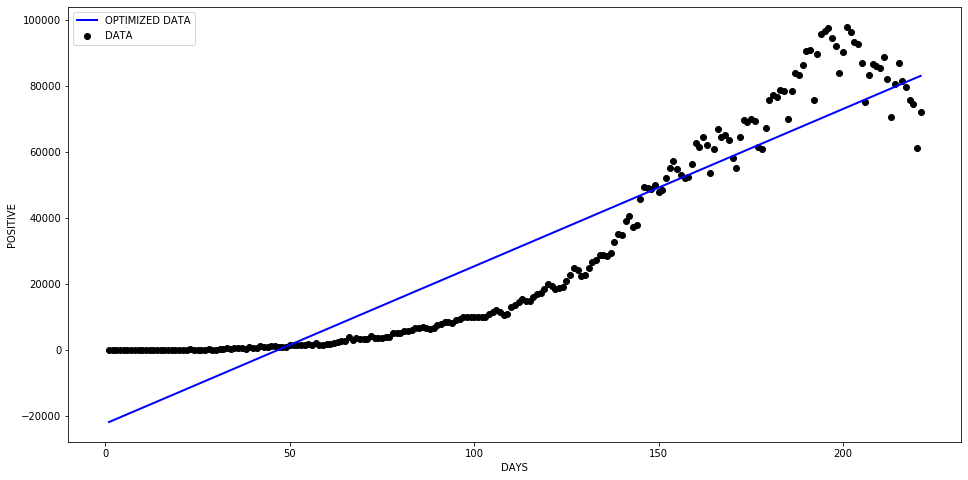

In [34]:
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black',label="DATA"
)
plt.plot(
    X,
    y_pred,
    c='blue',
    linewidth=2,label="OPTIMIZED DATA"
)
plt.xlabel("DAYS")
plt.ylabel("POSITIVE")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import r2_score

r2_1 = r2_score(y ,y_pred )

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms1 = sqrt(mean_squared_error(y, y_pred))

In [37]:
lin_reg_pred = reg.predict([[n]])

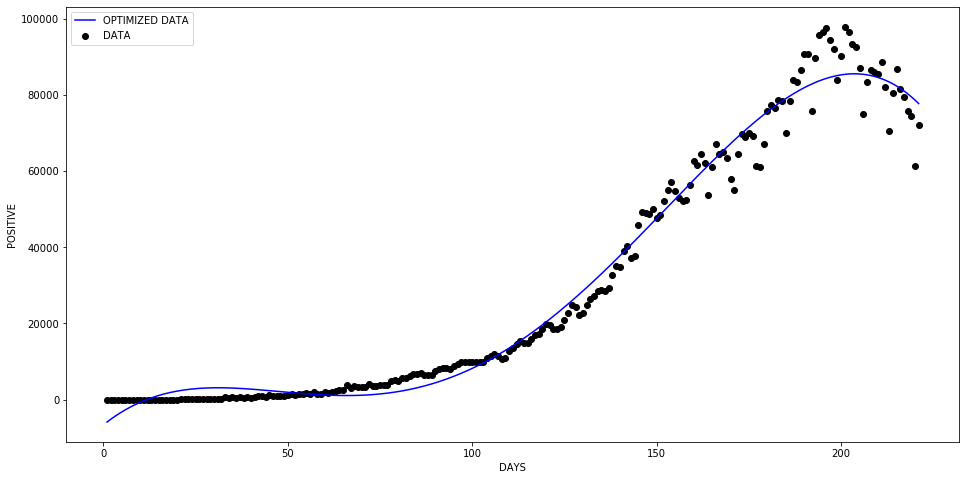

In [38]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)
pred = lin2.predict(X_poly)
X, y_pred1 = zip(*sorted(zip(X, pred)))

plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black',label="DATA"
)
plt.plot(
    X, y_pred1,
    c='blue',label="OPTIMIZED DATA"
)
plt.xlabel("DAYS")
plt.ylabel("POSITIVE")
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import r2_score

r2_2 = r2_score(y ,y_pred1)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms2 = sqrt(mean_squared_error(y, y_pred))

In [40]:
poly_pred = lin2.predict(poly.fit_transform([[n]]))
poly_pred

array([[67784.4500554]])

In [41]:
import numpy as np 
  
# curve-fit() function imported from scipy 
from scipy.optimize import curve_fit 
  
from matplotlib import pyplot as plt 

In [42]:
X = data['DAY'].values.reshape(-1,1)
k = data[logarithm].values.reshape(-1,1)

The linear model to find the coeffecients of the exponential regression is: Y = 4.0523 + 0.041496X
alpha = 4.0523
beta = 0.041496


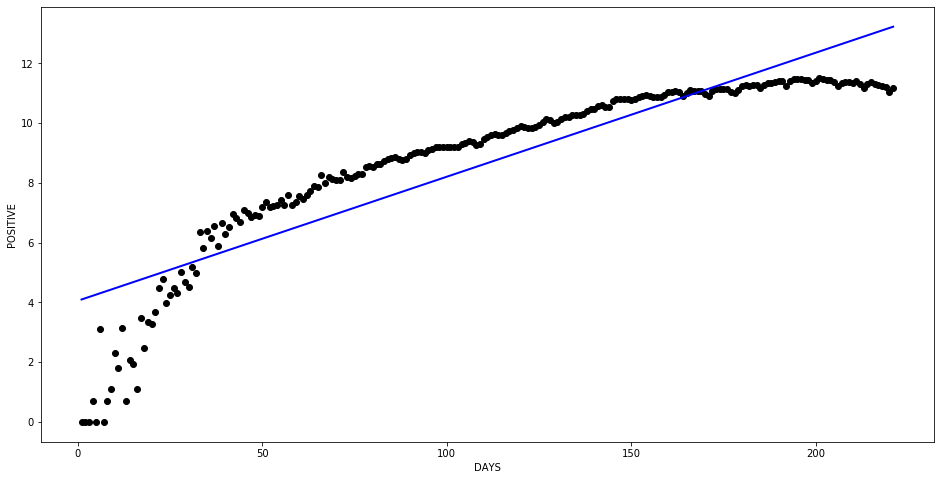

In [43]:
reg = LinearRegression()
reg.fit(X, k)
predictions = reg.predict(X)
print("The linear model to find the coeffecients of the exponential regression is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
print("alpha = {:.5}".format(reg.intercept_[0]))
alpha=reg.intercept_[0]
print("beta = {:.5}".format(reg.coef_[0][0]))
beta = reg.coef_[0][0]
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    k,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("DAYS")
plt.ylabel("POSITIVE")
plt.show()



57.53114518107712
0.0414964437582773


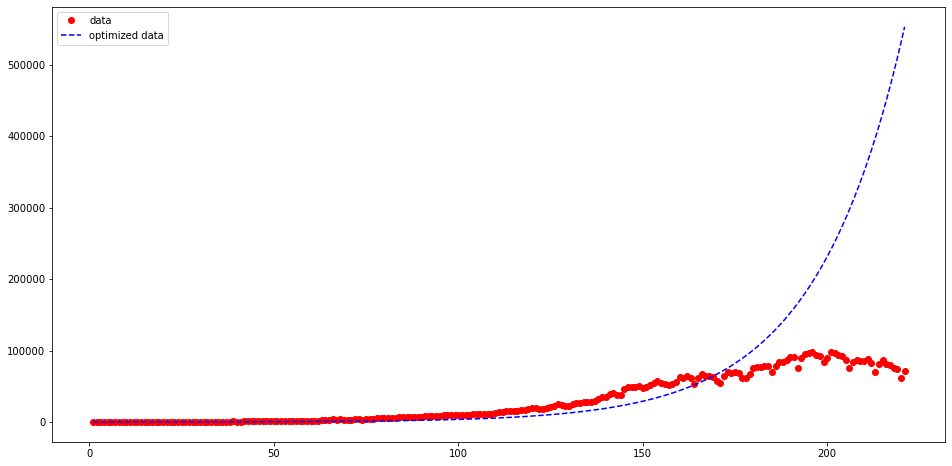

EQUATION  =  57.53114518107712 exp( 0.0414964437582773 )


In [44]:
ans=[]
l=np.exp(alpha)
print(l)
k = beta
print(k)
for i in range(len(X)):
    ans.append(l*(np.exp(k*X[i])))
plt.figure(figsize=(16, 8))
plt.plot(X, y, 'o', color ='red', label ="data") 
plt.plot(X, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show()
print("EQUATION  = ",l,"exp(",k,")")

In [45]:
expo_pred = l*(np.exp(k*n))

In [46]:
from sklearn.metrics import r2_score

r2_3 = r2_score(y ,ans)
from sklearn.metrics import mean_squared_error
from math import sqrt

rms3 = sqrt(mean_squared_error(y, ans))

In [47]:
pred = []
pred.append(lin_reg_pred[0][0])
pred.append(poly_pred[0][0])
pred.append(expo_pred)

In [48]:
max1 = max(r2_1,r2_2,r2_3)
pred_cases = 0
r2 = 0
X_PRED = []
Y_PRED = []
if (max1 == r2_1):
  pred_cases = pred[0]
  r2 = r2_1  
  reg = "LINEAR"
  X_PRED = X
  Y_PRED = y_pred
  rmse = rms1 
elif (max1 == r2_2):
  pred_cases = pred[1]
  r2 = r2_2
  reg = "POLYNOMIAL"
  X_PRED = X
  Y_PRED = y_pred1
  rmse = rms1
else:
  pred_cases = pred[2]
  r2 = r2_3
  reg = "EXPONENTIAL"
  X_PRED = X
  Y_PRED = ans
  rmse = rms1

In [49]:
import pandas as pd
import math
df = pd.DataFrame({'Country':[string],
                   'Regression Type':[reg],
                   'r2_SCORE':[r2],
                   'rmse':[rmse],
                   'Date':[inp],
                   'Predicted no of cases':[math.ceil(pred_cases)]})
df

,Country,Regression Type,r2_SCORE,rmse,Date,Predicted no of cases
0,India,POLYNOMIAL,0.983102,12271.864082,15/10/2020,67785


In [50]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkinter import simpledialog 
from PIL import Image, ImageTk
import tkinter.font as font
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from IPython.display import HTML, Javascript, display
import IPython


root = Tk()
root.title("FINAL OUTPUT")
root.geometry("5000x3000")
root.configure(background="black")

class Example(Frame):
    def __init__(self, master, *pargs):
        Frame.__init__(self, master, *pargs)



        self.image = Image.open("pred_op1.png")
        self.img_copy= self.image.copy()


        self.background_image = ImageTk.PhotoImage(self.image)

        self.background = Label(self, image=self.background_image)
        self.background.pack(fill=BOTH, expand=YES)
        self.background.bind('<Configure>', self._resize_image)

    def _resize_image(self,event):

        new_width = event.width
        new_height = event.height

        self.image = self.img_copy.resize((new_width, new_height))

        self.background_image = ImageTk.PhotoImage(self.image)
        self.background.configure(image =  self.background_image)

text1 = "SELECTED COUNTRY :"+string
text2 = "SELECTED DATE :"+inp
text3 = string1+" PREDICTION : "+str(math.ceil(pred_cases))
text4 = "TREND BEING FOLLOWED : "+reg
text5 = "PREDICTION ACCURACY : "+str(round(r2*100,2))+"%"

e = Example(root)
e.pack(fill=BOTH, expand=YES)

myFont = font.Font(family = "Cambria",size=15)
myFont1 = font.Font(size = 20)

img = PhotoImage("pred_op3.png")

w = tk.Label(root, text="WELCOME TO THE COVID-19 PREDICTOR",bg = "grey12",fg = "white")
w['font'] = myFont1
w.place(relx = 0.32 , rely = 0.01)

w1 = tk.Label(root, text=text1,bg = "sky blue",fg = "black")
w1['font'] = myFont
w1.place(relx = 0.1 , rely = 0.1)

w2 = tk.Label(root, text=text2,bg = "sky blue",fg = "black")
w2['font'] = myFont
w2.place(relx = 0.1 , rely = 0.2)

w3 = tk.Label(root, text=text3,bg = "sky blue",fg = "black")
w3['font'] = myFont
w3.place(relx = 0.7 , rely = 0.1)

w5 = tk.Label(root, text=text5,bg = "sky blue",fg = "black")
w5['font'] = myFont
w5.place(relx = 0.7 , rely = 0.2)

w4 = tk.Label(root, text=text4,bg = "sky blue",fg = "black")
w4['font'] = myFont
w4.place(relx = 0.7 , rely = 0.3)

def initialize():
    display(HTML(
        '''
            <script>
                code_show = false;
                
                    IPython.notebook.kernel.restart();
                    
                        IPython.notebook.execute_all_cells();
                    
                
            </script>
        '''
    ))

button3 = Button(root, text = "CLICK HERE TO RESTART", command = initialize,bg='sky blue',fg = 'black')
button3['font'] = myFont
button3.place(relx=0.7, rely=0.4)
def close_window():
    root.destroy()
button5 = Button(root)
button5['text'] ="CLICK HERE TO QUIT THE WINDOW."
button5['command'] = close_window
button5['font'] = myFont
button5['bg'] = 'sky blue'
button5.place(relx = 0.7,rely = 0.8)


class mclass:
    def __init__(self,  root):
        self.root = root
        self.button = Button (root, text="DISPLAY GRAPH", command=self.plot,bg = "sky blue",fg = "black")
        self.button['font'] = myFont
        self.button.place(relx = 0.1,rely = 0.3)

    def plot (self):
        x= X_PRED
        v= y
        p= []
        for i in range(len(Y_PRED)):
            p.append(Y_PRED[i][0])
        
        q = np.array(p)
        fig = Figure(figsize=(7,5))
        a = fig.add_subplot(111)
        a.scatter(x,v,color='red',label = "DATA")
        a.plot(x, q,color='blue',label  = "PREDICTION CURVE")

        a.set_title (reg, fontsize=16)
        a.set_ylabel("Y", fontsize=14)
        a.set_xlabel("X", fontsize=14)
        a.legend()
        canvas = FigureCanvasTkAgg(fig, master=self.root)
        canvas.get_tk_widget().place(relx = 0.05,rely = 0.4)
        canvas.draw()

start= mclass (root)


root.mainloop()